# Pytorch Data Augmentation

Augmentation 數據增強，是對原資料進行各種不同處理方法來讓資料集更多樣化的一種手法，除了可以增加數據集的多樣化以外，也可以提升模型的泛化能力

Pytorch 有主要兩種的數據增強包

- ```torchvision.transforms:``` 須注意不同的數據增強方法會對應不同的格式
- ```augmentations:``` 數據用字典儲存，必須以鍵值讀取

## torchvision transforms

torchvision 應該是 pytorch 支援最多的一個包了，除了包含多種不同數據增強方法外，同時也有各種預訓練模型供使用者進行微調

在使用 transforms 方法時，我們要用 Compose 方法來串接所有我們要執行的數據增強方法

更多 transforms 方法請見 [transforms DOC](https://pytorch.org/vision/stable/transforms.html)

In [20]:
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import torch

In [25]:
HEIGHT, WIDTH = 28, 28

mean = [0.485, 0.456, 0.456]
std = [0.229, 0.224, 0.225]

# You may modify the code below this line, check https://pytorch.org/vision/stable/transforms.html
TRAIN_TRANSFORM = transforms.Compose([
    transforms.Resize((WIDTH, HEIGHT)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.5),
    transforms.ToTensor(),
    #transforms.Normalize(mean, std),
])

TEST_TRANSFORM = transforms.Compose([
    transforms.Resize((WIDTH, HEIGHT)),
    transforms.ToTensor(),
    #transforms.Normalize(mean, std)
])

In [26]:
#collapse-output
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=TRAIN_TRANSFORM
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=TEST_TRANSFORM
)

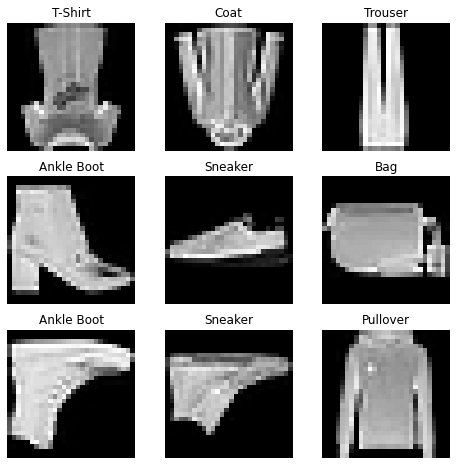

In [27]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## albumentations

albumentations 是另一個支援影像數據增強的套件，基本用法和 torchvision transforms 大同小異

In [30]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

os.chdir('/content/gdrive/MyDrive/pytorchAI')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


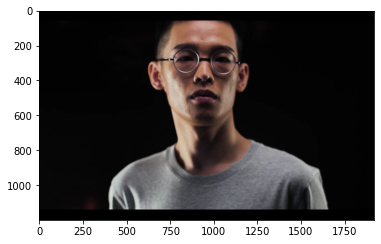

In [32]:
image = plt.imread('roger.jpg')
plt.imshow(image)

In [45]:
import albumentations as A

transform = A.Compose([
    #A.RandomCrop(width=512, height=512),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.8),
])

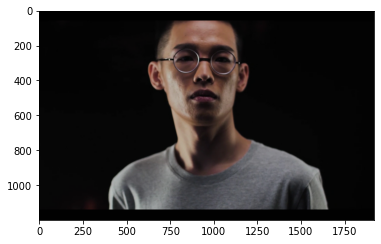

In [44]:
roger = transform(image = image)['image']
plt.imshow(roger)

### Image Segmentation

如果你的任務是影像分割，你可以用以下方法取出 image 和 mask，這種方法的 image 和 mask 會 apply 同一種數據增強方法

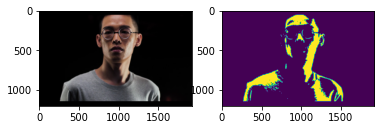

In [67]:
import cv2

mask = cv2.imread('roger.jpg')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
mask = cv2.threshold(mask,127,255,cv2.THRESH_BINARY)[1] / 255

transformed = transform(image = image, mask = mask)
image = transformed['image']
mask = transformed['mask']

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(mask)